In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving teraterm1.csv to teraterm1.csv


In [ ]:
df=pd.read_csv("teraterm1.csv",header=None)

In [ ]:
df1=df.iloc[21:221]

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
21,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,1832594543,0,266,0,0,1832.99,384,[10 33 16 0 -23 25 -18 20 -14 13 -11 7 -10 2 -...
22,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,1833231304,0,114,0,0,1833.63,384,[114 -96 6 0 32 9 25 6 17 5 10 5 3 6 -2 8 -6 1...
23,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,1834246145,0,114,0,0,1834.65,384,[114 -96 6 0 -31 19 -24 16 -17 10 -12 4 -9 -1 ...
24,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,1835262801,0,114,0,0,1835.66,384,[114 -96 6 0 8 -35 5 -29 5 -20 6 -14 7 -7 10 -...
25,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,1836278212,0,114,0,0,1836.68,384,[114 -96 6 0 -6 -36 -5 -29 -2 -21 1 -14 5 -9 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,CSI_DATA,STA,F0:C8:50:4C:19:33,-42,11,1,7,0,1,1,...,11,0,1998813644,0,114,0,0,1999.21,384,[114 -96 6 0 -19 -29 -17 -24 -11 -18 -6 -14 -1...
217,CSI_DATA,STA,F0:C8:50:4C:19:33,-42,11,1,7,0,1,1,...,11,0,1998849219,0,82,0,0,1999.25,384,[82 -96 4 0 -24 26 -18 21 -15 15 -12 8 -11 3 -...
218,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,1999829213,0,114,0,0,2000.23,384,[114 -96 6 0 -29 17 -23 14 -17 9 -12 3 -9 -2 -...
219,CSI_DATA,STA,F0:C8:50:4C:19:33,-43,11,1,7,0,1,1,...,11,0,2000844912,0,114,0,0,2001.24,384,[114 -96 6 0 -10 34 -8 27 -7 18 -7 11 -8 4 -11...


In [ ]:
df1.reset_index(inplace=True,drop=True)

In [ ]:
df1.to_csv("teraterm01_train.csv",header=None)
files.download('teraterm01_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
amp1=[]
ph1=[]

In [ ]:
#CSI_data1.iloc[1,10]

In [ ]:
#CSI_data1.iloc[0,22]

In [ ]:
#CSI_data1

In [ ]:
CSI = df1.iloc[:,-1]
CSI = np.array(CSI)
CSI.shape

(200,)

In [ ]:
amp1 = []
ph1 = []

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving teraterm01_train.csv to teraterm01_train (1).csv


In [ ]:
import re
from math import sqrt, atan2

if __name__ == "__main__":
    """
    This script file demonstrates how to transform raw CSI out from the ESP32 into CSI-amplitude and CSI-phase.
    """

    FILE_NAME = "teraterm01_train (1).csv"

    f = open(FILE_NAME)

    for j, l in enumerate(f.readlines()):
        imaginary = []
        real = []
        amplitudes = []
        phases = []

        # Parse string to create integer list
        csi_string = re.findall(r"\[(.*)\]", l)[0]
        csi_raw = [int(x) for x in csi_string.split(" ") if x != '']

        # Create list of imaginary and real numbers from CSI
        for i in range(len(csi_raw)):
            if i % 2 == 0:
                imaginary.append(csi_raw[i])
            else:
                real.append(csi_raw[i])

        # Transform imaginary and real into amplitude and phase
        for i in range(int(len(csi_raw) / 2)):
            amplitudes.append(sqrt(imaginary[i] ** 2 + real[i] ** 2))
            phases.append(atan2(imaginary[i], real[i]))

        print("-------------------")
        print("csi_amplitude#{}:".format(j), amplitudes)
        print("csi_phase#{}:    ".format(j), phases)
        print("-------------------")
        amp1.append(amplitudes)
        ph1.append(phases)

-------------------
csi_amplitude#0: [34.48187929913333, 16.0, 33.97057550292606, 26.90724809414742, 19.1049731745428, 13.038404810405298, 10.198039027185569, 11.704699910719626, 14.422205101855956, 18.601075237738275, 22.47220505424423, 24.596747752497688, 27.51363298439521, 28.861739379323623, 29.154759474226502, 30.01666203960727, 29.017236257093817, 27.073972741361768, 24.020824298928627, 20.024984394500787, 14.317821063276353, 10.295630140987, 5.830951894845301, 6.082762530298219, 8.06225774829855, 10.63014581273465, 14.212670403551895, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.385164807134504, 6.324555320336759, 8.48528137423857, 11.180339887498949, 17.08800749063506, 23.769728648009426, 29.427877939124322, 33.13608305156178, 35.014282800023196, 35.0, 32.01562118716424, 30.01666203960727, 26.076809620810597, 21.213203435596427, 18.027756377319946, 14.035668847618199, 10.44030650891055, 12.041594578792296, 15.0, 20.591260281974, 25.553864678361276, 32.7566787083184,

In [ ]:
amp_1=pd.DataFrame(amp1)

In [ ]:
amp_1.shape

(200, 64)

In [ ]:
ph_1 = pd.DataFrame(ph1)

In [ ]:
mac_address_1 = df1.iloc[:,0:3]

In [ ]:
mac_address_1

,0,1,2
0,CSI_DATA,STA,F0:C8:50:4C:19:33
1,CSI_DATA,STA,F0:C8:50:4C:19:33
2,CSI_DATA,STA,F0:C8:50:4C:19:33
3,CSI_DATA,STA,F0:C8:50:4C:19:33
4,CSI_DATA,STA,F0:C8:50:4C:19:33
...,...,...,...
195,CSI_DATA,STA,F0:C8:50:4C:19:33
196,CSI_DATA,STA,F0:C8:50:4C:19:33
197,CSI_DATA,STA,F0:C8:50:4C:19:33
198,CSI_DATA,STA,F0:C8:50:4C:19:33


In [ ]:
result1 = pd.concat([mac_address_1, amp_1], axis=1)
result1.columns = list(range(len(result1.columns)))

In [ ]:
result1# Amplitude values of subcarriers

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,CSI_DATA,STA,F0:C8:50:4C:19:33,34.481879,16.0,33.970576,26.907248,19.104973,13.038405,10.198039,...,10.440307,12.041595,15.000000,20.591260,25.553865,32.756679,38.275318,41.400483,44.687806,45.254834
1,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,33.241540,25.709920,17.720045,11.180340,6.708204,...,8.062258,9.219544,12.529964,18.601075,24.413111,31.064449,35.846897,40.718546,42.154478,43.324358
2,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,36.359318,28.844410,19.723083,12.649111,9.055385,...,9.848858,11.401754,14.866069,20.615528,25.961510,33.526109,39.217343,43.462628,45.617979,45.650849
3,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,35.902646,29.427878,20.615528,15.231546,9.899495,...,11.704700,12.041595,15.231546,20.248457,26.419690,33.120990,38.013156,43.081318,46.486557,46.572524
4,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,36.496575,29.427878,21.095023,14.035669,10.295630,...,11.313708,10.440307,15.000000,19.235384,26.172505,33.241540,38.118237,43.000000,47.042534,49.162994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,34.669872,29.410882,21.095023,15.231546,11.045361,...,11.661904,11.401754,14.866069,19.416488,24.738634,31.048349,35.735137,40.311289,42.485292,44.294469
196,CSI_DATA,STA,F0:C8:50:4C:19:33,126.253713,4.0,35.383612,27.658633,21.213203,14.422205,11.401754,...,10.440307,10.630146,14.422205,18.788294,23.706539,30.886890,35.510562,39.824616,42.520583,42.426407
197,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,33.615473,26.925824,19.235384,12.369317,9.219544,...,8.544004,9.219544,12.649111,18.439089,24.738634,31.320920,35.735137,40.853396,44.283180,44.777226
198,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,35.440090,28.160256,19.313208,13.038405,8.944272,...,8.544004,9.219544,13.892444,20.000000,26.076810,33.286634,37.589892,43.382024,46.615448,48.703183


In [ ]:
a_series1 = (result1 != 0).any(axis=0)

In [ ]:
a_series1

0     True
1     True
2     True
3     True
4     True
      ... 
62    True
63    True
64    True
65    True
66    True
Length: 67, dtype: bool

In [ ]:
new_amp_1 = result1.loc[:,a_series1]

In [ ]:
new_amp_1

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,CSI_DATA,STA,F0:C8:50:4C:19:33,34.481879,16.0,33.970576,26.907248,19.104973,13.038405,10.198039,...,10.440307,12.041595,15.000000,20.591260,25.553865,32.756679,38.275318,41.400483,44.687806,45.254834
1,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,33.241540,25.709920,17.720045,11.180340,6.708204,...,8.062258,9.219544,12.529964,18.601075,24.413111,31.064449,35.846897,40.718546,42.154478,43.324358
2,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,36.359318,28.844410,19.723083,12.649111,9.055385,...,9.848858,11.401754,14.866069,20.615528,25.961510,33.526109,39.217343,43.462628,45.617979,45.650849
3,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,35.902646,29.427878,20.615528,15.231546,9.899495,...,11.704700,12.041595,15.231546,20.248457,26.419690,33.120990,38.013156,43.081318,46.486557,46.572524
4,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,36.496575,29.427878,21.095023,14.035669,10.295630,...,11.313708,10.440307,15.000000,19.235384,26.172505,33.241540,38.118237,43.000000,47.042534,49.162994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,34.669872,29.410882,21.095023,15.231546,11.045361,...,11.661904,11.401754,14.866069,19.416488,24.738634,31.048349,35.735137,40.311289,42.485292,44.294469
196,CSI_DATA,STA,F0:C8:50:4C:19:33,126.253713,4.0,35.383612,27.658633,21.213203,14.422205,11.401754,...,10.440307,10.630146,14.422205,18.788294,23.706539,30.886890,35.510562,39.824616,42.520583,42.426407
197,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,33.615473,26.925824,19.235384,12.369317,9.219544,...,8.544004,9.219544,12.649111,18.439089,24.738634,31.320920,35.735137,40.853396,44.283180,44.777226
198,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,35.440090,28.160256,19.313208,13.038405,8.944272,...,8.544004,9.219544,13.892444,20.000000,26.076810,33.286634,37.589892,43.382024,46.615448,48.703183


In [ ]:
new_amp_1.shape

(200, 56)

In [ ]:
amp_sta_phone1 = new_amp_1[new_amp_1[:][2]=='F0:C8:50:4C:19:33']
amp_sta_phone1

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,CSI_DATA,STA,F0:C8:50:4C:19:33,34.481879,16.0,33.970576,26.907248,19.104973,13.038405,10.198039,...,10.440307,12.041595,15.000000,20.591260,25.553865,32.756679,38.275318,41.400483,44.687806,45.254834
1,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,33.241540,25.709920,17.720045,11.180340,6.708204,...,8.062258,9.219544,12.529964,18.601075,24.413111,31.064449,35.846897,40.718546,42.154478,43.324358
2,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,36.359318,28.844410,19.723083,12.649111,9.055385,...,9.848858,11.401754,14.866069,20.615528,25.961510,33.526109,39.217343,43.462628,45.617979,45.650849
3,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,35.902646,29.427878,20.615528,15.231546,9.899495,...,11.704700,12.041595,15.231546,20.248457,26.419690,33.120990,38.013156,43.081318,46.486557,46.572524
4,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,36.496575,29.427878,21.095023,14.035669,10.295630,...,11.313708,10.440307,15.000000,19.235384,26.172505,33.241540,38.118237,43.000000,47.042534,49.162994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,34.669872,29.410882,21.095023,15.231546,11.045361,...,11.661904,11.401754,14.866069,19.416488,24.738634,31.048349,35.735137,40.311289,42.485292,44.294469
196,CSI_DATA,STA,F0:C8:50:4C:19:33,126.253713,4.0,35.383612,27.658633,21.213203,14.422205,11.401754,...,10.440307,10.630146,14.422205,18.788294,23.706539,30.886890,35.510562,39.824616,42.520583,42.426407
197,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,33.615473,26.925824,19.235384,12.369317,9.219544,...,8.544004,9.219544,12.649111,18.439089,24.738634,31.320920,35.735137,40.853396,44.283180,44.777226
198,CSI_DATA,STA,F0:C8:50:4C:19:33,149.036908,6.0,35.440090,28.160256,19.313208,13.038405,8.944272,...,8.544004,9.219544,13.892444,20.000000,26.076810,33.286634,37.589892,43.382024,46.615448,48.703183


In [ ]:
amp_sta_phone1_arr=np.array(amp_sta_phone1)
amp_sta_phone1_arr

array([['CSI_DATA', 'STA', 'F0:C8:50:4C:19:33', ..., 41.400483088968905,
        44.68780594300866, 45.254833995939045],
       ['CSI_DATA', 'STA', 'F0:C8:50:4C:19:33', ..., 40.718546143004666,
        42.15447781671598, 43.32435804486894],
       ['CSI_DATA', 'STA', 'F0:C8:50:4C:19:33', ..., 43.46262762420146,
        45.617978911828175, 45.65084884205331],
       ...,
       ['CSI_DATA', 'STA', 'F0:C8:50:4C:19:33', ..., 40.85339643163099,
        44.28317965096906, 44.77722635447622],
       ['CSI_DATA', 'STA', 'F0:C8:50:4C:19:33', ..., 43.382023926967726,
        46.61544808322666, 48.703182647543684],
       ['CSI_DATA', 'STA', 'F0:C8:50:4C:19:33', ..., 41.0,
        43.73785545725808, 44.28317965096906]], dtype=object)

In [ ]:
amp_sta_phone1_arr=amp_sta_phone1_arr[:,5:]
amp_sta_phone1_arr

array([[33.97057550292606, 26.90724809414742, 19.1049731745428, ...,
        41.400483088968905, 44.68780594300866, 45.254833995939045],
       [33.24154027718932, 25.709920264364882, 17.72004514666935, ...,
        40.718546143004666, 42.15447781671598, 43.32435804486894],
       [36.359317925395686, 28.844410203711913, 19.72308292331602, ...,
        43.46262762420146, 45.617978911828175, 45.65084884205331],
       ...,
       [33.61547262794322, 26.92582403567252, 19.235384061671343, ...,
        40.85339643163099, 44.28317965096906, 44.77722635447622],
       [35.4400902933387, 28.160255680657446, 19.313207915827967, ...,
        43.382023926967726, 46.61544808322666, 48.703182647543684],
       [35.05709628591621, 28.0, 20.09975124224178, ..., 41.0,
        43.73785545725808, 44.28317965096906]], dtype=object)

In [ ]:
amp_sta_phone1_arr.shape

(200, 51)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
#Variation of one sample for all sub carriers

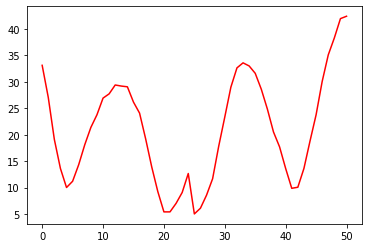

(51,)

In [ ]:
test_1=amp_sta_phone1_arr[20,:]
plt.plot(test_1, 'r')
plt.show()
test_1.shape

In [ ]:
test_1_1=amp_sta_phone1_arr[:,:]
test_1_11=test_1_1.transpose()
test_1_11.shape

(51, 200)

In [ ]:
#Variation for one sub carrier for all samples

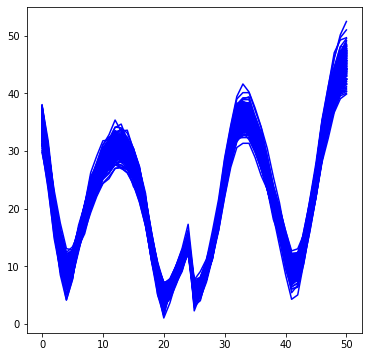

In [ ]:
test_1_1=amp_sta_phone1_arr[:,:]
test_1_11=test_1_1.transpose()
plt.rcParams["figure.figsize"]=6,6;
plt.plot(test_1_11,'b');

In [ ]:
test_1_1.shape

(200, 51)

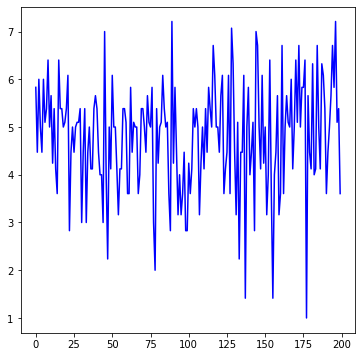

In [ ]:
test_1_1=amp_sta_phone1_arr[:,20]
test_1_11=test_1_1.transpose()
plt.rcParams["figure.figsize"]=6,6;
plt.plot(test_1_11,'b');

In [ ]:
test_1_11.shape

(200,)

(200, 51)
max_std_idx = 50
mean1 =  45.148175336903435
standard_deviation = 2.1923264410998824
upper_limit1 = 46.148175336903435
lower_limit1 = 44.148175336903435


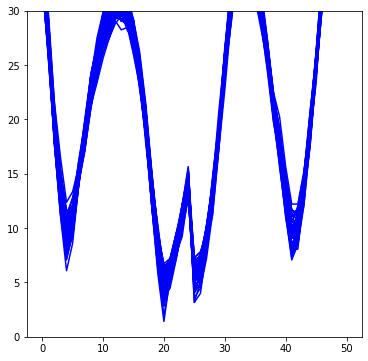

(51, 64)


In [ ]:
#Filter

filter_step1_1=amp_sta_phone1_arr[:,0:51] #Select the suitable range from observing the plot
data=np.copy(filter_step1_1[:,:])
data_frame=pd.DataFrame(data)
print(data_frame.shape)

std_values=data_frame.std()
std_values

max_std_idx=std_values.idxmax()
print("max_std_idx =",max_std_idx)

mean1=data_frame[:][max_std_idx].mean()
print("mean1 = ",mean1)
standard_deviation = data_frame[:][max_std_idx].std()
print("standard_deviation =",standard_deviation)

upper_limit1=mean1+1
print("upper_limit1 =",upper_limit1)
lower_limit1=mean1-1
print("lower_limit1 =",lower_limit1)

data_frame1=data_frame[(data_frame[:][max_std_idx]>lower_limit1)&(data_frame[:][max_std_idx]<upper_limit1)]
data_frame1

data_frame_filtered=np.array(data_frame1)
data_frame_filtered1=data_frame_filtered[:,:]
data_frame_filtered1.shape
data_frame_filtered1=data_frame_filtered1.transpose()

plt.plot(data_frame_filtered1,'b')
plt.ylim(0, 30)
plt.show()
print(data_frame_filtered1.shape)

In [ ]:
data_frame1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,33.970576,26.907248,19.104973,13.038405,10.198039,11.7047,14.422205,18.601075,22.472205,24.596748,...,10.440307,12.041595,15.0,20.59126,25.553865,32.756679,38.275318,41.400483,44.687806,45.254834
2,36.359318,28.84441,19.723083,12.649111,9.055385,10.630146,14.422205,18.867962,22.803509,25.495098,...,9.848858,11.401754,14.866069,20.615528,25.96151,33.526109,39.217343,43.462628,45.617979,45.650849
6,32.649655,25.942244,18.35756,12.041595,8.544004,9.486833,13.892444,18.027756,22.36068,25.079872,...,9.219544,8.544004,12.806248,18.384776,24.758837,31.144823,36.235342,40.804412,44.102154,44.777226
8,34.928498,28.79236,19.697716,13.601471,10.29563,12.041595,15.524175,19.646883,23.537205,26.172505,...,9.055385,10.77033,15.0,19.79899,26.248809,33.42155,37.20215,42.190046,45.177428,45.188494
14,33.286634,26.07681,18.35756,12.649111,9.055385,9.219544,13.892444,17.888544,21.633308,23.600847,...,9.219544,9.219544,13.0,17.464249,24.041631,30.364453,35.1141,39.92493,43.382024,44.777226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,34.985711,28.017851,19.235384,13.601471,10.049876,11.401754,15.0,19.416488,23.430749,25.455844,...,9.848858,9.433981,13.601471,19.235384,24.738634,32.015621,36.687873,41.231056,44.28318,45.650849
189,34.785054,28.460499,19.646883,13.038405,8.944272,10.816654,14.866069,18.973666,23.4094,26.400758,...,8.602325,9.486833,14.035669,19.0,25.0,32.062439,37.121422,41.436699,44.911023,45.607017
195,34.669872,29.410882,21.095023,15.231546,11.045361,11.7047,15.0,17.804494,21.633308,24.186773,...,11.661904,11.401754,14.866069,19.416488,24.738634,31.048349,35.735137,40.311289,42.485292,44.294469
197,33.615473,26.925824,19.235384,12.369317,9.219544,10.630146,15.264338,18.867962,23.021729,24.839485,...,8.544004,9.219544,12.649111,18.439089,24.738634,31.32092,35.735137,40.853396,44.28318,44.777226


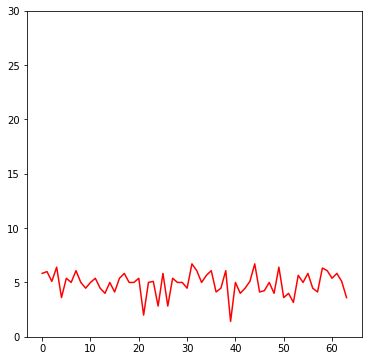

In [ ]:
test_1_1=data_frame_filtered[:,20]
plt.ylim(0, 30)
plt.plot(test_1_1,'r')
plt.show()

In [ ]:
amp_sta_phone1_arr[50:450,0:51].shape

(150, 51)

In [ ]:
amp_sta_phone1_arr.shape

(200, 51)

In [ ]:
data_frame1.head(60)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,33.970576,26.907248,19.104973,13.038405,10.198039,11.7047,14.422205,18.601075,22.472205,24.596748,...,10.440307,12.041595,15.0,20.59126,25.553865,32.756679,38.275318,41.400483,44.687806,45.254834
2,36.359318,28.84441,19.723083,12.649111,9.055385,10.630146,14.422205,18.867962,22.803509,25.495098,...,9.848858,11.401754,14.866069,20.615528,25.96151,33.526109,39.217343,43.462628,45.617979,45.650849
6,32.649655,25.942244,18.35756,12.041595,8.544004,9.486833,13.892444,18.027756,22.36068,25.079872,...,9.219544,8.544004,12.806248,18.384776,24.758837,31.144823,36.235342,40.804412,44.102154,44.777226
8,34.928498,28.79236,19.697716,13.601471,10.29563,12.041595,15.524175,19.646883,23.537205,26.172505,...,9.055385,10.77033,15.0,19.79899,26.248809,33.42155,37.20215,42.190046,45.177428,45.188494
14,33.286634,26.07681,18.35756,12.649111,9.055385,9.219544,13.892444,17.888544,21.633308,23.600847,...,9.219544,9.219544,13.0,17.464249,24.041631,30.364453,35.1141,39.92493,43.382024,44.777226
16,36.013886,28.017851,20.024984,13.341664,10.0,10.77033,15.132746,19.104973,23.345235,25.70992,...,9.433981,11.045361,14.317821,19.313208,25.298221,32.280025,38.078866,41.593269,44.28318,45.044423
18,32.526912,26.172505,19.104973,12.529964,9.0,10.816654,14.142136,18.439089,22.627417,24.839485,...,8.062258,9.219544,13.038405,18.35756,24.186773,31.38471,35.510562,40.804412,44.045431,45.276926
21,35.777088,29.529646,20.615528,14.56022,11.18034,12.806248,15.620499,20.0,24.083189,26.870058,...,10.0,11.18034,14.317821,20.099751,26.172505,32.388269,37.854986,42.720019,45.880279,46.097722
24,34.176015,27.513633,20.615528,15.264338,11.401754,11.401754,15.033296,17.117243,21.023796,24.0,...,11.045361,11.401754,13.892444,18.439089,24.207437,30.610456,35.0,39.661064,43.908997,44.28318
25,33.54102,26.832816,18.788294,12.369317,8.246211,9.219544,14.317821,18.027756,22.36068,24.698178,...,9.848858,9.433981,13.341664,19.104973,24.33105,31.575307,35.902646,41.761226,44.598206,45.694639


In [ ]:
from google.colab import files
data_frame1.head(60).to_csv('Filter01.csv',header=None) 
files.download('Filter01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>